---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

## Preamble and Review

### we must apply the scaling to the test set that we computed for the training set

### X_train me scaler.fit_transform kiya hai, X_test me scaler.transform hi hai. aage sab kaam ye scaled data se hi kiya hai

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
list(fruits['fruit_name'].unique())

['apple', 'mandarin', 'orange', 'lemon']

In [6]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]  #direct one steo me bhi kar sakte hai
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [8]:
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
example_fruit_scaled

array([[ 0.23, -1.06, -0.24,  0.41]])

In [13]:
print(knn.predict(example_fruit_scaled))
print(knn.predict(example_fruit_scaled)[0])
print(target_names_fruits[knn.predict(example_fruit_scaled)[0]])

[2]
2
orange


In [14]:
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1]) 
# -1 karna pada because target variable is like 1,2,3,4
# apple is 1, mandarin is 2 etc.
# lekin apni list me (jaha target variable ka naam aata hai)
# waha index 0 se start hota hai

Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


## Datasets

<IPython.core.display.Javascript object>


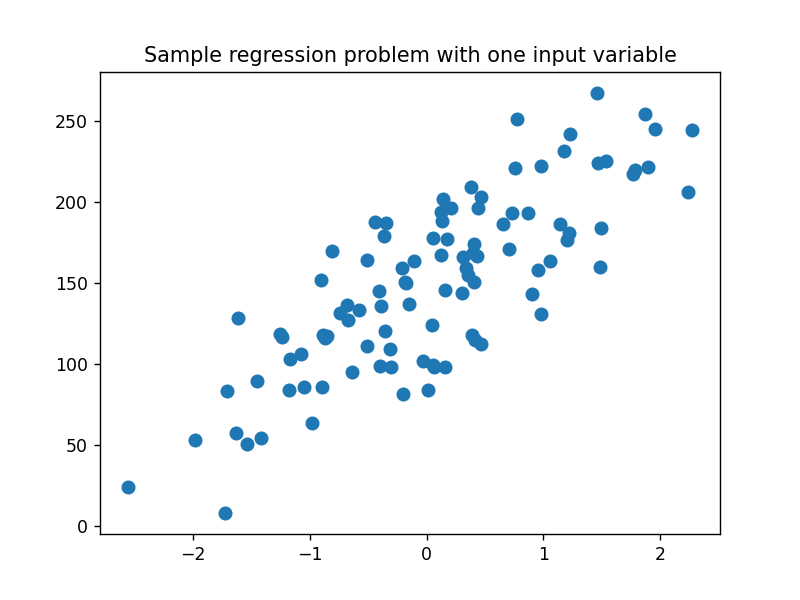

X_R1 is 
  [[-0.36]
 [ 0.98]
 [ 0.4 ]
 [-0.81]
 [-0.89]
 [ 0.44]
 [-0.98]
 [ 0.43]
 [ 0.21]
 [-0.31]
 [-0.51]
 [ 0.13]
 [-1.54]
 [-0.4 ]
 [ 0.65]
 [ 1.18]
 [-0.18]
 [ 1.79]
 [ 1.45]
 [-0.68]
 [ 0.98]
 [ 1.9 ]
 [-0.44]
 [ 0.31]
 [ 0.76]
 [ 0.78]
 [ 1.95]
 [ 0.33]
 [-0.35]
 [ 1.53]
 [-0.9 ]
 [-0.58]
 [-1.05]
 [ 0.38]
 [ 0.01]
 [ 0.46]
 [ 0.14]
 [-0.4 ]
 [ 0.05]
 [-1.25]
 [ 1.05]
 [ 0.4 ]
 [-1.71]
 [ 2.24]
 [ 0.18]
 [-0.21]
 [ 1.23]
 [-0.85]
 [ 1.76]
 [ 0.41]
 [-0.91]
 [-1.42]
 [ 0.47]
 [ 0.9 ]
 [ 1.14]
 [ 0.4 ]
 [ 0.39]
 [-1.73]
 [ 1.47]
 [-0.19]
 [-0.87]
 [ 0.3 ]
 [ 1.2 ]
 [-1.98]
 [-2.55]
 [-1.45]
 [-0.03]
 [ 0.15]
 [ 1.22]
 [ 1.87]
 [ 2.27]
 [-0.74]
 [ 0.07]
 [ 1.49]
 [-0.67]
 [-1.63]
 [ 0.13]
 [ 0.95]
 [ 1.49]
 [ 0.06]
 [ 0.86]
 [ 0.71]
 [-0.15]
 [-1.07]
 [-0.1 ]
 [-0.3 ]
 [-0.39]
 [ 0.73]
 [ 0.12]
 [-0.51]
 [-1.23]
 [-0.21]
 [-0.63]
 [ 0.16]
 [ 0.05]
 [-1.17]
 [-0.36]
 [ 0.36]
 [-1.61]
 [-1.18]]
y_R1 is 
  [120.61 131.23 150.56 169.91 118.16 196.36  63.87 166.52 196.7  109.35
 110.9

In [15]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression #MAKE REGRESSION GIVES SIMPL OUTPUT
plt.figure()
plt.title('Sample regression problem with one input variable') #OKAY ONLY, SIRF PARAMETERS PASS KARKE OUTPUT MILA HAI
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
print('X_R1 is \n ',  X_R1)
print('y_R1 is \n ',  y_R1)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

<IPython.core.display.Javascript object>


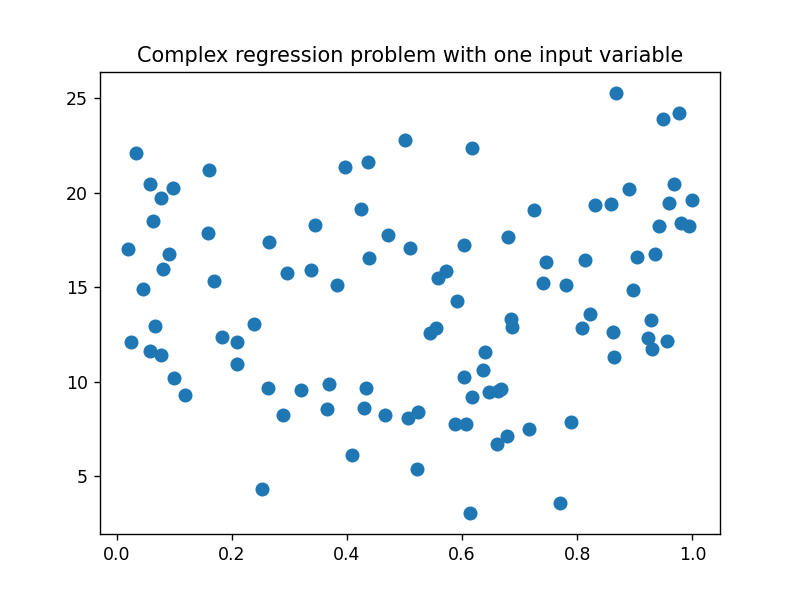

X_F1 is 
  [[0.55 0.72 0.6  0.54 0.42 0.65 0.44]
 [0.89 0.96 0.38 0.79 0.53 0.57 0.93]
 [0.07 0.09 0.02 0.83 0.78 0.87 0.98]
 [0.8  0.46 0.78 0.12 0.64 0.14 0.94]
 [0.52 0.41 0.26 0.77 0.46 0.57 0.02]
 [0.62 0.61 0.62 0.94 0.68 0.36 0.44]
 [0.7  0.06 0.67 0.67 0.21 0.13 0.32]
 [0.36 0.57 0.44 0.99 0.1  0.21 0.16]
 [0.65 0.25 0.47 0.24 0.16 0.11 0.66]
 [0.14 0.2  0.37 0.82 0.1  0.84 0.1 ]
 [0.98 0.47 0.98 0.6  0.74 0.04 0.28]
 [0.12 0.3  0.12 0.32 0.41 0.06 0.69]
 [0.57 0.27 0.52 0.09 0.58 0.93 0.32]
 [0.67 0.13 0.72 0.29 0.18 0.59 0.02]
 [0.83 0.   0.68 0.27 0.74 0.96 0.25]
 [0.58 0.59 0.57 0.22 0.95 0.45 0.85]
 [0.7  0.3  0.81 0.4  0.88 0.58 0.88]
 [0.69 0.73 0.5  0.96 0.64 0.42 0.61]
 [0.02 0.3  0.66 0.29 0.62 0.43 0.14]
 [0.3  0.57 0.59 0.57 0.65 0.65 0.43]
 [0.9  0.37 0.44 0.89 0.81 0.7  0.1 ]
 [0.92 0.71 1.   0.15 0.87 0.16 0.62]
 [0.12 0.85 0.81 0.57 0.41 0.07 0.7 ]
 [0.45 0.72 0.87 0.98 0.86 0.01 0.36]
 [0.73 0.17 0.52 0.05 0.2  0.02 0.79]
 [0.22 0.35 0.93 0.7  0.03 0.16 0.62]
 

In [16]:
# synthetic dataset for more complex regression 
from sklearn.datasets import make_friedman1 #MAKE FRIEDMAN1 GIVES COMPLEX OUTPUT
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0) #7 FEATURES LIYA HAI (MAYBE 8 AGAR 0 SE START HOTA HAI)

print('X_F1 is \n ',  X_F1)
print('X_F1[:,2] is \n',  X_F1[:,2])
print('y_F1 is \n ',  y_F1)
plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50) #ONLY 1 FEATURE LIYA ABHI
plt.show()

<IPython.core.display.Javascript object>


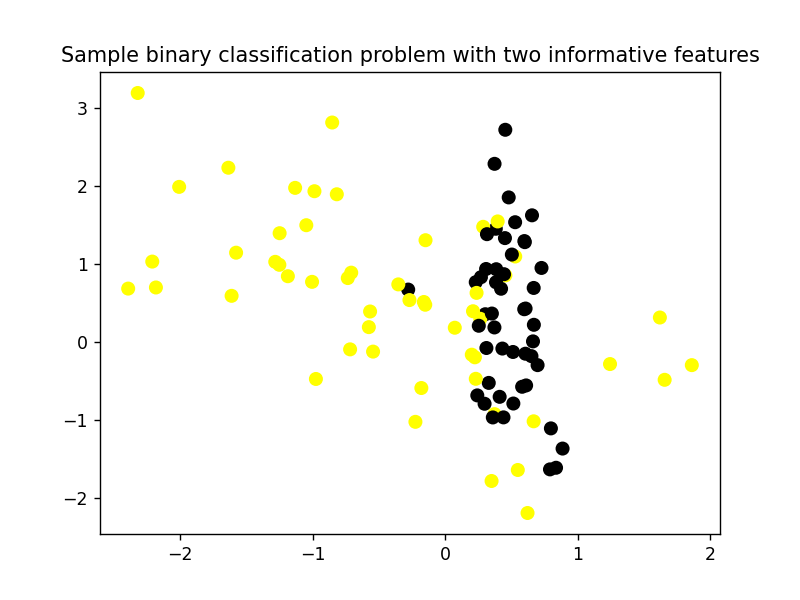

X_C2 is 
  [[ 0.37 -0.92]
 [-0.16  0.51]
 [-1.64  2.23]
 [ 0.62 -2.19]
 [-0.99  1.93]
 [-0.15  1.31]
 [ 1.62  0.31]
 [-2.01  1.99]
 [ 0.51 -0.13]
 [ 0.41 -0.7 ]
 [ 0.53  1.1 ]
 [ 0.6   1.28]
 [ 0.45  0.85]
 [-1.01  0.77]
 [ 0.48  1.85]
 [ 0.3  -0.79]
 [ 0.33 -0.52]
 [ 0.6  -0.15]
 [ 0.5   1.12]
 [ 0.61  0.43]
 [-1.28  1.03]
 [ 0.31  0.94]
 [ 0.38  1.45]
 [ 0.36 -0.97]
 [ 0.3   0.36]
 [ 0.65 -0.18]
 [-0.15  0.48]
 [ 0.45  1.33]
 [ 0.29  1.48]
 [ 0.44 -0.96]
 [-0.28  0.67]
 [ 0.73  0.95]
 [ 0.44  0.87]
 [ 0.66  0.01]
 [ 0.55 -1.64]
 [-0.98 -0.47]
 [-0.71  0.89]
 [-1.13  1.98]
 [ 0.67  0.22]
 [ 0.35 -1.78]
 [-1.61  0.59]
 [-0.72 -0.09]
 [-0.23 -1.02]
 [ 1.24 -0.28]
 [ 0.26  0.3 ]
 [-1.19  0.84]
 [ 0.84 -1.61]
 [-0.54 -0.12]
 [-2.32  3.19]
 [ 0.6   0.42]
 [ 0.22 -0.19]
 [ 0.61 -0.56]
 [ 0.45  2.72]
 [ 0.8  -1.11]
 [ 0.58 -0.57]
 [ 0.23 -0.47]
 [ 0.6   1.29]
 [ 0.24 -0.68]
 [-1.25  0.99]
 [ 0.38  0.93]
 [-0.85  2.81]
 [ 0.53  1.54]
 [-1.05  1.5 ]
 [-2.21  1.03]
 [ 0.42  0.68]
 [-1.58  1.15]

In [18]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0) # 2 FEATURES LIYA HAI, CLASSIFICATION KE LIYE YAHA
print('X_C2 is \n ',  X_C2)
print('X_C2[:,0] is \n',  X_C2[:,0])
print('X_C2[:,1] is \n',  X_C2[:,1])
print('y_C2 is \n ',  y_C2) #binary classication
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold) #PLOT BHI 2 FEATURE WISE KIYA HAI (2 X KE VALUE SETS)
plt.show()

X_D2 is 
  [[ -7.35   0.67]
 [  5.47  -5.36]
 [  8.55   2.96]
 [ 12.23   1.46]
 [  5.75  -5.75]
 [  6.66   9.24]
 [ -5.41   1.68]
 [  6.58  -6.47]
 [ 12.67   4.75]
 [ -7.49   0.19]
 [  7.84   1.4 ]
 [ -3.15  -1.89]
 [  9.56 -10.31]
 [  5.21  -7.2 ]
 [ 11.58 -10.14]
 [ 11.54  -0.5 ]
 [  0.86  -6.47]
 [  5.07  -4.88]
 [ -7.09   2.01]
 [ -4.93  -0.62]
 [ -5.83  -3.86]
 [ -5.13   4.03]
 [ -7.34   2.07]
 [  9.28   5.34]
 [  7.34 -10.44]
 [  7.97   4.96]
 [ -4.14  -1.58]
 [ -7.06   3.09]
 [  7.9    2.03]
 [  9.4   -2.12]
 [  9.63 -10.19]
 [  8.49   1.65]
 [ -6.78  -0.16]
 [ -8.52   4.71]
 [  9.06   5.86]
 [  9.2    5.38]
 [ 12.17  -9.32]
 [  8.06   1.02]
 [  7.41  -4.02]
 [ -7.25   2.54]
 [  6.93   8.  ]
 [ -4.41   0.95]
 [  5.17  -6.13]
 [  9.36   9.76]
 [ 11.47  -0.82]
 [  3.22  -7.68]
 [ -4.55  -0.2 ]
 [ -4.06   0.03]
 [  9.55  -0.63]
 [ -3.47  -1.07]
 [  5.48  -5.2 ]
 [  4.34  -6.93]
 [  8.3   -9.51]
 [  4.48  -7.48]
 [  4.71  -7.51]
 [  6.44   9.19]
 [  4.04  -6.63]
 [ 10.77  -9.2 ]
 [ 

<IPython.core.display.Javascript object>


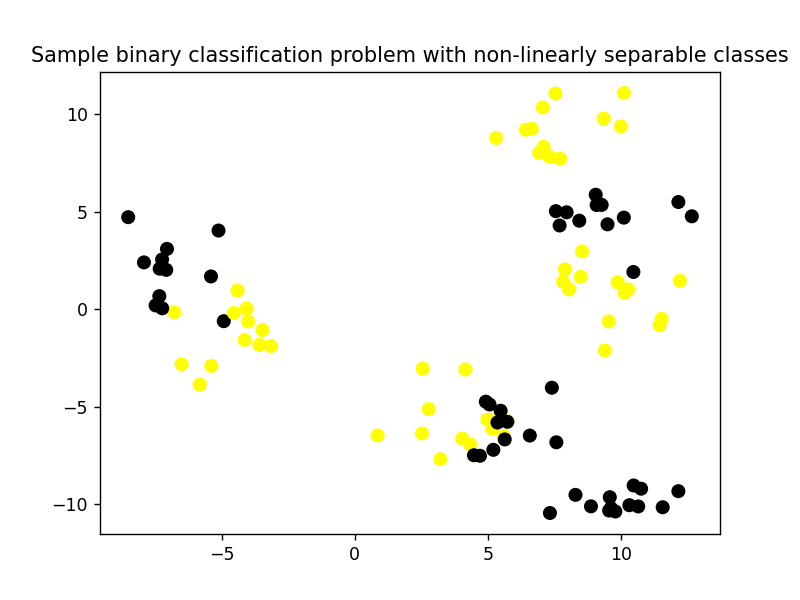

In [17]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4) #MAKE BLOBS MAKES EVEN MORE COMPLEX CLASSIFICATION

print('X_D2 is \n ',  X_D2)
print('X_D2[:,0] is \n',  X_D2[:,0])
print('X_D2[:,1] is \n',  X_D2[:,1])
print('y_D2 is \n ',  y_D2)

y_D2 = y_D2 % 2
print('new y_D2 is \n ',  y_D2) #matlab labels diye hai even ko 0 baki ko 1
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold) #PLOT BHI 2 FEATURE WISE KIYA HAI (2 X KE VALUE SETS)
plt.show()

In [34]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_cancer[:2], y_cancer[:5]
# 30 features!

(array([[1.80e+01, 1.04e+01, 1.23e+02, 1.00e+03, 1.18e-01, 2.78e-01,
         3.00e-01, 1.47e-01, 2.42e-01, 7.87e-02, 1.09e+00, 9.05e-01,
         8.59e+00, 1.53e+02, 6.40e-03, 4.90e-02, 5.37e-02, 1.59e-02,
         3.00e-02, 6.19e-03, 2.54e+01, 1.73e+01, 1.85e+02, 2.02e+03,
         1.62e-01, 6.66e-01, 7.12e-01, 2.65e-01, 4.60e-01, 1.19e-01],
        [2.06e+01, 1.78e+01, 1.33e+02, 1.33e+03, 8.47e-02, 7.86e-02,
         8.69e-02, 7.02e-02, 1.81e-01, 5.67e-02, 5.43e-01, 7.34e-01,
         3.40e+00, 7.41e+01, 5.22e-03, 1.31e-02, 1.86e-02, 1.34e-02,
         1.39e-02, 3.53e-03, 2.50e+01, 2.34e+01, 1.59e+02, 1.96e+03,
         1.24e-01, 1.87e-01, 2.42e-01, 1.86e-01, 2.75e-01, 8.90e-02]]),
 array([0, 0, 0, 0, 0]))

In [27]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep_col_numbers = [5, 6] + list(range(11, 26)) + list(range(32, 103)) + [145]
    cols = crime.columns
    columns_to_keep = []
    for col_number in columns_to_keep_col_numbers:
        columns_to_keep.append(cols[col_number])

    crime = crime[columns_to_keep].dropna()

    X_crime = crime.drop('ViolentCrimesPerPop', axis=1)
    y_crime = crime['ViolentCrimesPerPop']
    return (X_crime, y_crime)

In [38]:
# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()
X_crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66


In [39]:
y_crime[:5]

0     41.02
1    127.56
2    218.59
3    306.64
5    442.95
Name: ViolentCrimesPerPop, dtype: float64

## K-Nearest Neighbors

### Classification

<IPython.core.display.Javascript object>


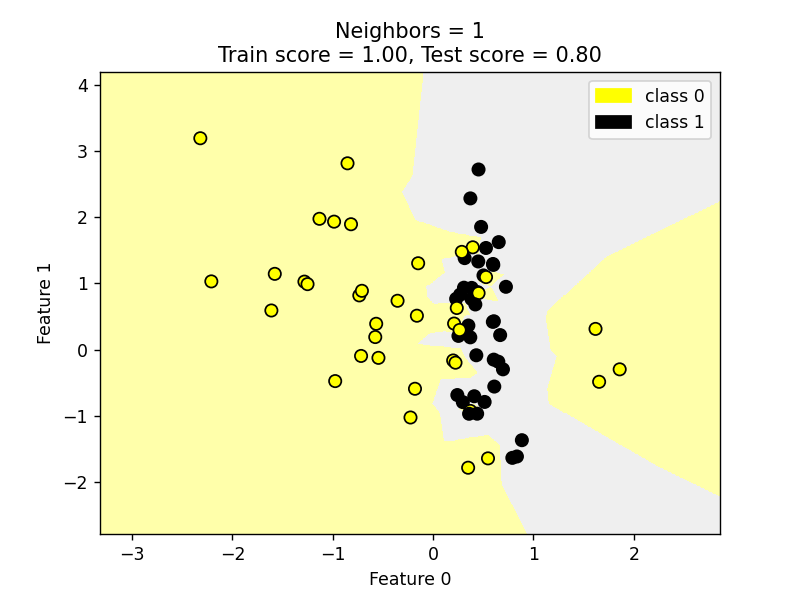

C:\Users\Sahil Girhepuje\Documents\Stdy\coursera\Applied DS with Python\Course3\course3_downloads\course3_downloads\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


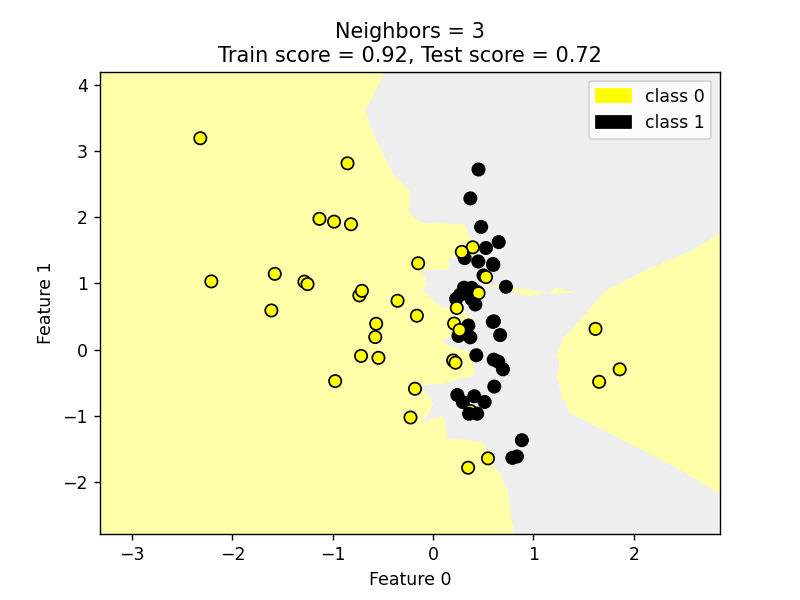

C:\Users\Sahil Girhepuje\Documents\Stdy\coursera\Applied DS with Python\Course3\course3_downloads\course3_downloads\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


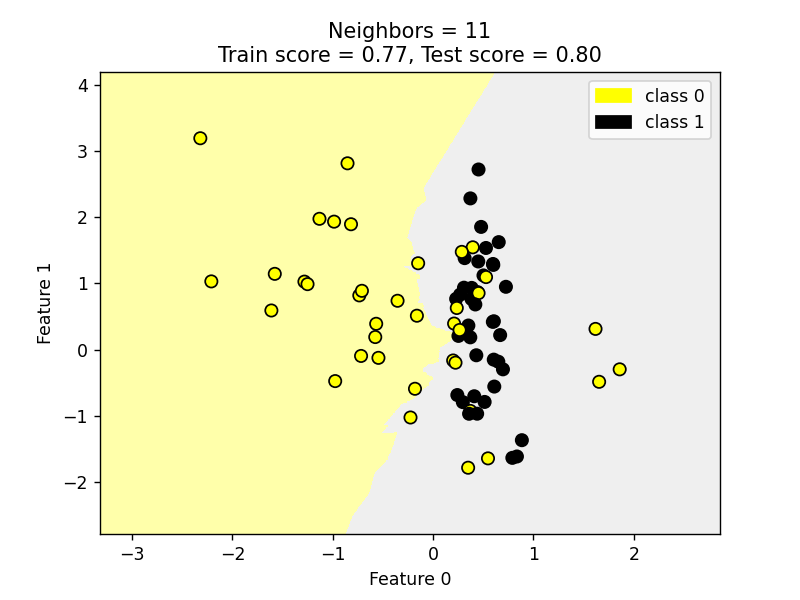

C:\Users\Sahil Girhepuje\Documents\Stdy\coursera\Applied DS with Python\Course3\course3_downloads\course3_downloads\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [40]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0) #SIMPLE BINARY CLASSIFICATION WALA

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

In [42]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0) #SIMPLE REGRESSION WALA

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print('prediction is \n',knnreg.predict(X_test), '\ntesting is \n',y_test)
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

prediction is 
 [231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91] 
testing is 
 [245.1  136.06 150.56 174.29  57.58 145.7  149.87 184.41 186.77 103.44
 143.6   95.27 160.22  99.06 166.52  85.72 187.93 221.   209.37 196.7
 206.67 176.42 169.91 131.6   81.58]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


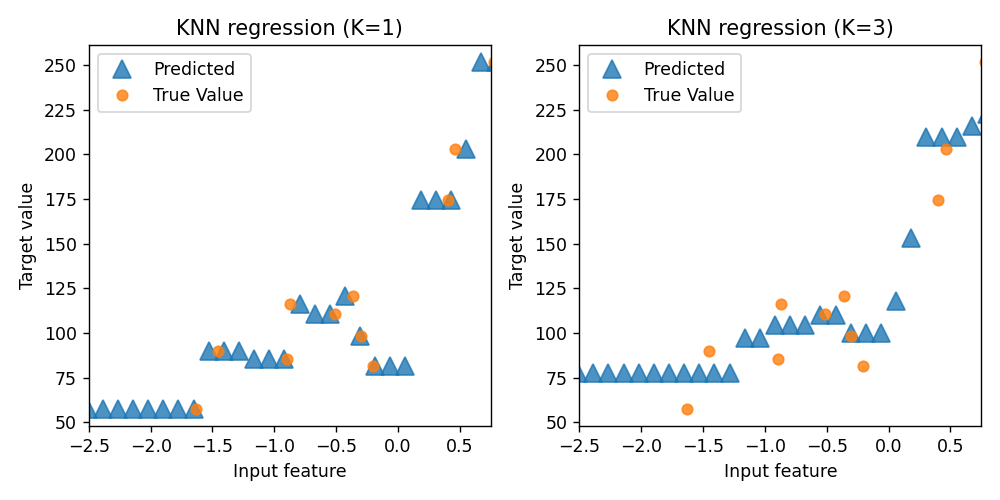

[[-3.  ]
 [-2.88]
 [-2.76]
 [-2.63]]


In [45]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
print(X_predict_input[:4])
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

In [46]:
for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

<IPython.core.display.Javascript object>


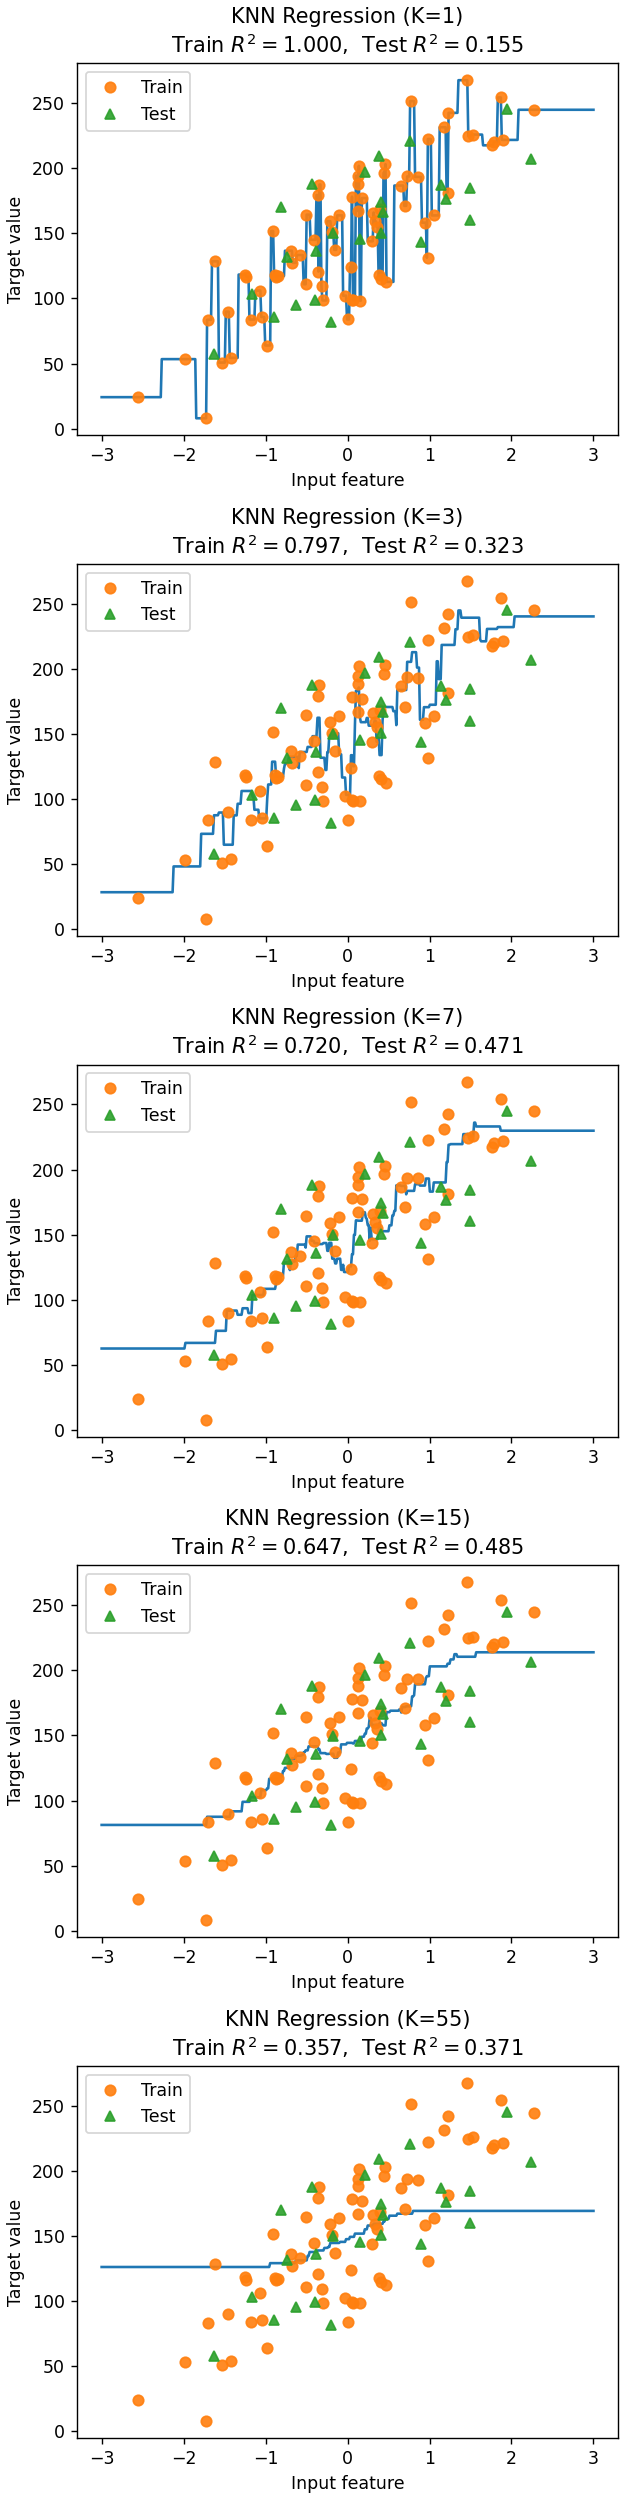

In [47]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

In [48]:
for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Linear models for regression

### Linear regression

### linreg.coef_ = w, and  linreg.intercept_ = b. OBSERVE THE _  AT THE END, yaha print nahi hua, lekin hai

In [54]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

print(X_train[:5], X_test[:5], y_train[:5], y_test[:5] )
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))

[[ 1.76]
 [-0.98]
 [-1.18]
 [-0.15]
 [ 0.13]] [[ 1.95]
 [-0.39]
 [ 0.4 ]
 [ 0.4 ]
 [-1.63]] [217.54  63.87  83.82 137.31 188.15] [245.1  136.06 150.56 174.29  57.58]
linear model coeff (w): [45.71]
linear model intercept (b): 148.446


In [55]:
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

R-squared score (training): 0.679
R-squared score (test): 0.492


### Linear regression: example plot 

<IPython.core.display.Javascript object>


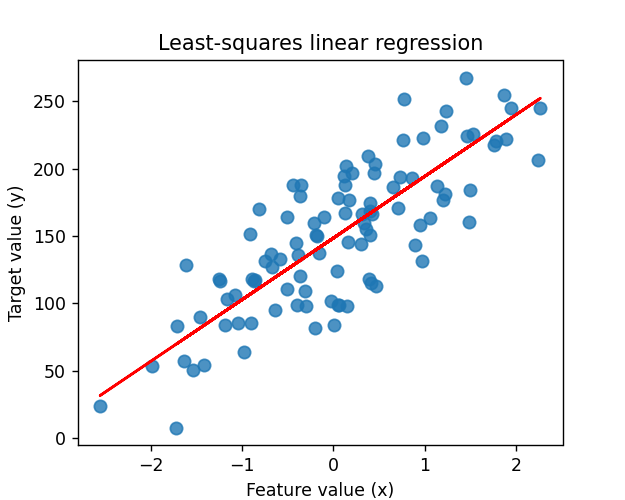

In [56]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-') #PLOTTING X AND Y, Y=MX+C
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

# print('X_train is \n', X_train.head(),'X_test is \n', X_test.head())
print('y_train is \n', y_train[:5],'y_test is \n', y_test[:5])
# wo left me sirf serial number hai (index)

y_train is 
 603     427.27
590     724.94
1649    978.02
1325    143.51
1250     61.69
Name: ViolentCrimesPerPop, dtype: float64 y_test is 
 2013       7.60
1464     852.74
1068     346.99
122     1497.92
1741     367.02
Name: ViolentCrimesPerPop, dtype: float64


In [62]:
print('Crime dataset')
print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}{}'.format(linreg.coef_, linreg.coef_.shape))
# 88 columns the na
#print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (training): {}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726021985
linear model coeff:
[ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+00](88,)
R-squared score (traini

### Ridge regression

In [63]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

In [65]:
print(X_crime.shape)
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_[:5]))

(1994, 88)
Crime dataset
ridge regression linear model intercept: -3352.4230358463437
ridge regression linear model coeff:
[ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00]


In [66]:
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('Number of zero features: {}'
     .format(np.sum(linridge.coef_ == 0))) 
# all features have been assigned weights then

R-squared score (training): 0.671
R-squared score (test): 0.494
Number of non-zero features: 88
Number of zero features: 0


#### Ridge regression with feature normalization
### normalisation se score improve hua hai!!

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

In [68]:
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_[:5]))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044156
ridge regression linear model coeff:
[ 88.69  16.49 -50.3  -82.91 -65.9 ]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge regression with regularization parameter: alpha

In [70]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0) #ye kya hai bhai?
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test)) #num abs(coeff) > 1.0 means what???

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50
Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56
Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59
Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60
Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58
Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55
Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30


### Lasso regression

### new and nice list comprehension for getting sorted list

In [71]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

In [72]:
print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_[:5]))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('zero features: {}'
     .format(np.sum(linlasso.coef_ == 0))) #big number bro
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

Crime dataset
lasso regression linear model intercept: 1186.6120619985786
lasso regression linear model coeff:
[   0.      0.     -0.   -168.18   -0.  ]
Non-zero features: 20
zero features: 68
R-squared score (training): 0.631
R-squared score (test): 0.624



In [78]:
print('two lists are\n',list(X_crime)[:5],'\n', linlasso.coef_[:10]) 
# list(X_crime) gives the column names in he form of a list
print('zip is',zip(list(X_crime[:3]), linlasso.coef_[:3])) 
print('list of zip is',list(zip(list(X_crime[:3]), linlasso.coef_[:3])))

two lists are
 ['population', 'householdsize', 'agePct12t21', 'agePct12t29', 'agePct16t24'] 
 [   0.      0.     -0.   -168.18   -0.     -0.      0.    119.69    0.
   -0.  ]
zip is <zip object at 0x000002C1F065F480>
list of zip is [('population', 0.0), ('householdsize', 0.0), ('agePct12t21', -0.0)]


In [79]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    #key is needed for sorting the list by values (values are the coeff)
    #negative sign makes it sort in desending order, usual order is positive
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	PctKidsBornNeverMar, 1488.365
	PctKids2Par, -1188.740
	HousVacant, 459.538
	PctPersDenseHous, 339.045
	NumInShelters, 264.932
	MalePctDivorce, 259.329
	PctWorkMom, -231.423
	pctWInvInc, -169.676
	agePct12t29, -168.183
	PctVacantBoarded, 122.692
	pctUrban, 119.694
	MedOwnCostPctIncNoMtg, -104.571
	MedYrHousBuilt, 91.412
	RentQrange, 86.356
	OwnOccHiQuart, 73.144
	PctEmplManu, -57.530
	PctBornSameState, -49.394
	PctForeignBorn, 23.449
	PctLargHouseFam, 20.144
	PctSameCity85, 5.198


#### Lasso regression with regularization parameter: alpha

### nice nice, as alpha increases, number of features kept decreases (underfitting increases) 

In [81]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58
Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60
Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62
Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63
Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61
Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58
Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50
Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30


### Polynomial regression

### linear model has 7 features, so quadratic model should have (linear terms)7 + (square terms) 7 + (7C2) 21  = 35 terms, phir yaha 36 kaise aaye
### Ridge transform ke liye sirf ridge lagta hai

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0) #ye complex regression wala hai
linreg = LinearRegression().fit(X_train, y_train)

In [93]:
print(type(linreg.coef_))
# print(np.ndarray.size(linreg.coef_))
print(len(linreg.coef_))

<class 'numpy.ndarray'>
7


In [96]:
print('running linear regression')
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

running linear regression
linear model coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722


In [101]:
np.shape(X_F1), np.shape(y_F1)

((100, 7), (100,))

In [104]:
# print('\nNow we transform the original input data to add\n\
# polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
print(np.shape(X_train), np.shape(y_train))
print(X_train[5])
linreg = LinearRegression().fit(X_train, y_train)

(75, 36) (75,)
[1.   0.97 0.99 0.41 0.16 0.64 0.49 0.99 0.95 0.96 0.4  0.16 0.62 0.48
 0.96 0.98 0.41 0.16 0.63 0.49 0.98 0.17 0.07 0.26 0.2  0.4  0.03 0.1
 0.08 0.16 0.41 0.31 0.63 0.24 0.49 0.98]


#### 37 columns = (7 original ke {1,2} degree terms = 14 + 2 degree ke liye combinations = 7C2 = 21 = 35 --> and sabke start me 1 aaya hai (why?)
also, 7 original ke {0,1,2} degree terms hone chahiye the na?

In [99]:
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



In [105]:
# print('\nAddition of many polynomial features often leads to\n\
# overfitting, so we often use polynomial features in combination\n\
# with regression that has a regularization penalty, like ridge\n\
# regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.    2.23  4.73 -3.15  3.86  1.61 -0.77 -0.15 -1.75  1.6   1.37  2.52
  2.72  0.49 -1.94 -1.63  1.51  0.89  0.26  2.05 -1.93  3.62 -0.72  0.63
 -3.16  1.29  3.55  1.73  0.94 -0.51  1.7  -1.98  1.81 -0.22  2.88 -0.89]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


## Linear models for classification

### Logistic regression

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)
### We need to train in matrix form and not direct df
# Lines 31, 32 are new!!!!!! ['a','b'][False] gives a, ['a','b'][True] gives b 

<IPython.core.display.Javascript object>


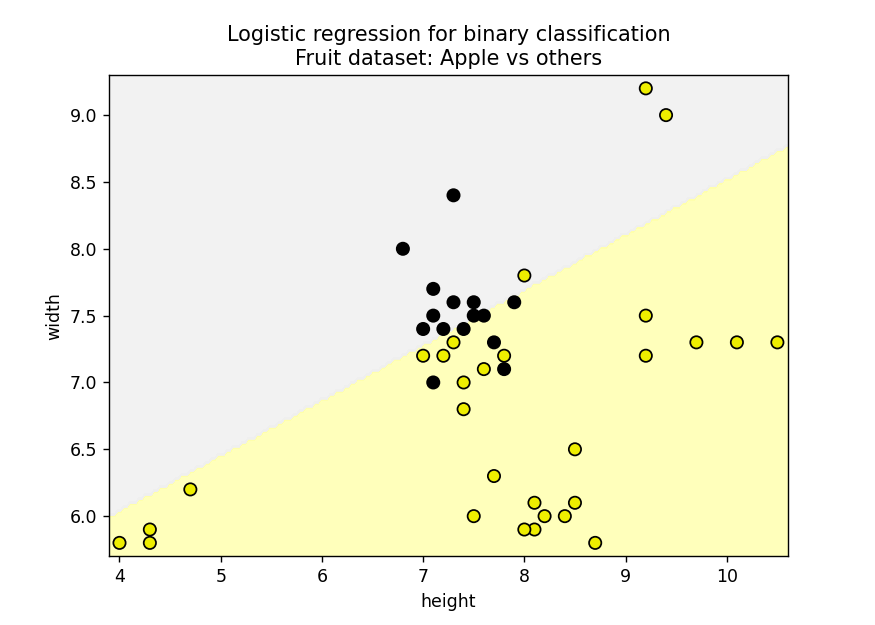

In [108]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

#print('y_fruits_2d initially is \n',y_fruits_2d)
#print('shapes of X_fruits_2d and y_fruits_2d are \n', X_fruits_2d.shape,y_fruits_2d.shape)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else

X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

In [115]:
#individual examples liye hai abhi 2
h = 6
w = 8
print('result is', clf.predict([[h,w]]), clf.predict([[h,w]])[0] )
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

result is [ True] True
A fruit with height 6 and width 8 is predicted to be: an apple


<ipython-input-115-78840ecc4384>:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))


In [114]:
print(['a','b'][True])
print(['a','b'][False])
# true is 1 and false is 0
print(float(True))

b
a
1.0


In [116]:
h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


<ipython-input-116-1aa5d377ce7d>:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))


## Remember logistic regression is used for classification
#### Logistic regression on simple synthetic dataset

<IPython.core.display.Javascript object>


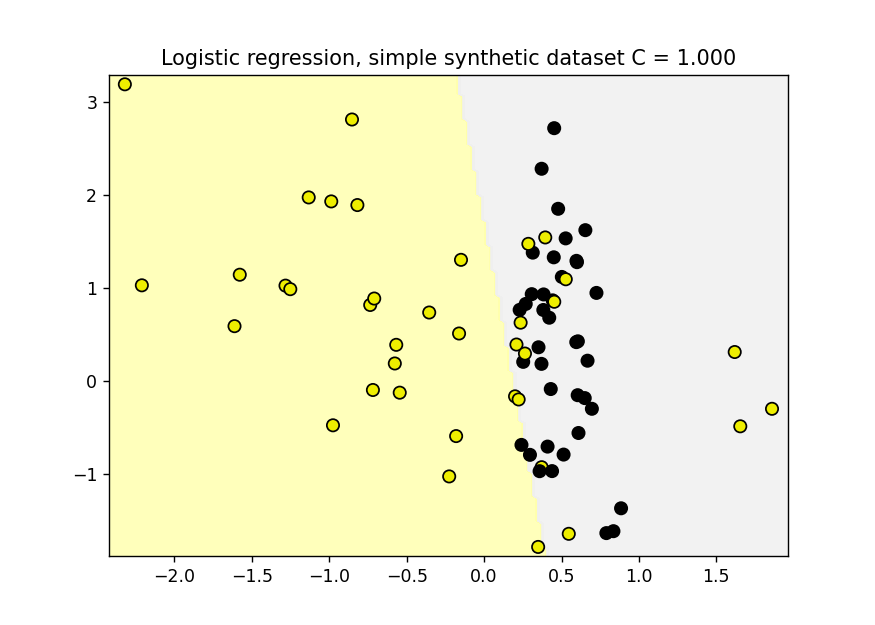

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


In [117]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0) #simple model jaha 2 parameters ko classify karna hai

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

#### Logistic regression regularization: C parameter

<IPython.core.display.Javascript object>


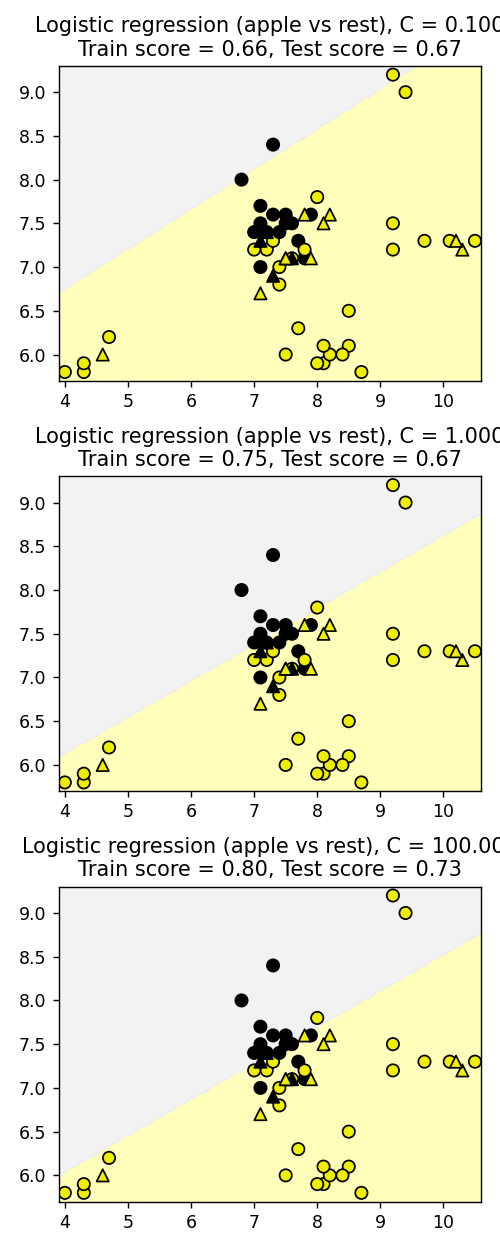

In [119]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C) 
    #title me train score and test score kaha se aa raha hai?
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

#### Application to real dataset

In [120]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


C:\Users\Sahil Girhepuje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machines

#### Linear Support Vector Machine

<IPython.core.display.Javascript object>


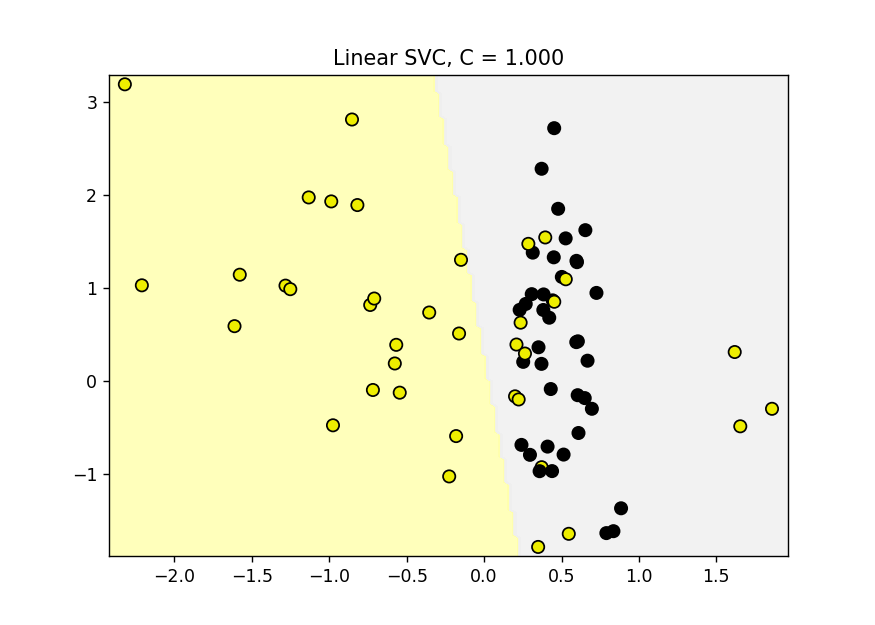

In [121]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0) #two features wala, classification ke liye

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train) #interesting, kernel ko linear banana padta hai
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

<IPython.core.display.Javascript object>


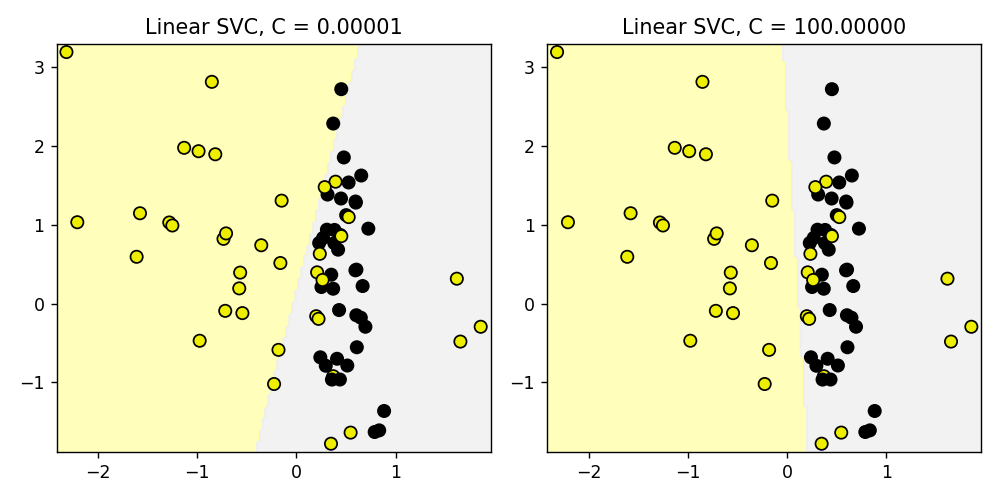

C:\Users\Sahil Girhepuje\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [122]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [123]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.95


C:\Users\Sahil Girhepuje\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers. Right, all are one vs all other classifiers

In [124]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.3   0.72]
 [-1.63  1.16]
 [ 0.01  0.43]
 [ 1.25 -1.64]]
Intercepts:
 [-3.29  1.2  -3.04  1.16]


C:\Users\Sahil Girhepuje\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Multi-class results on the fruit dataset

<IPython.core.display.Javascript object>


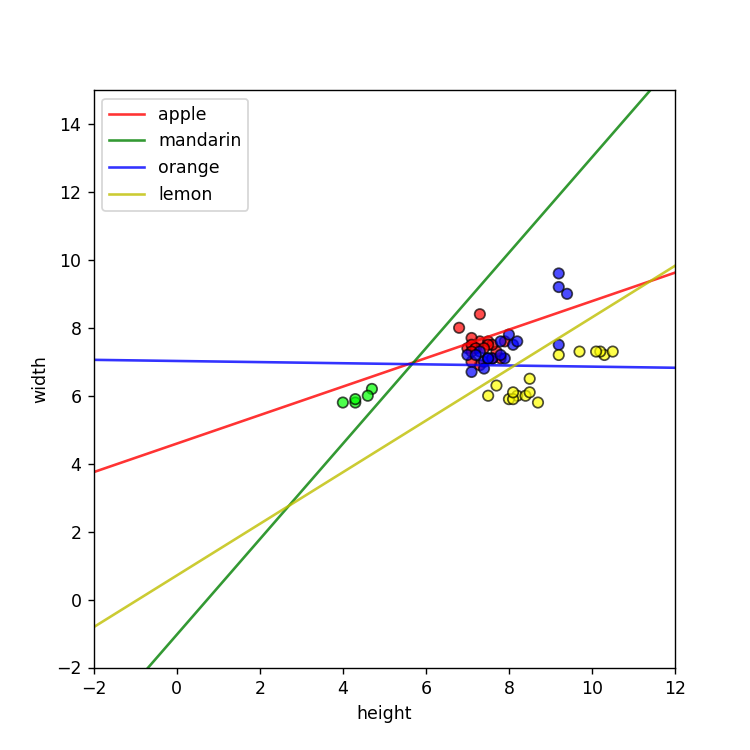

In [125]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']): # this loop is for plotting the straight lines
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    #VARIBALE X_1 KAAM KA HAI. HOW???????
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

### Classification

<IPython.core.display.Javascript object>


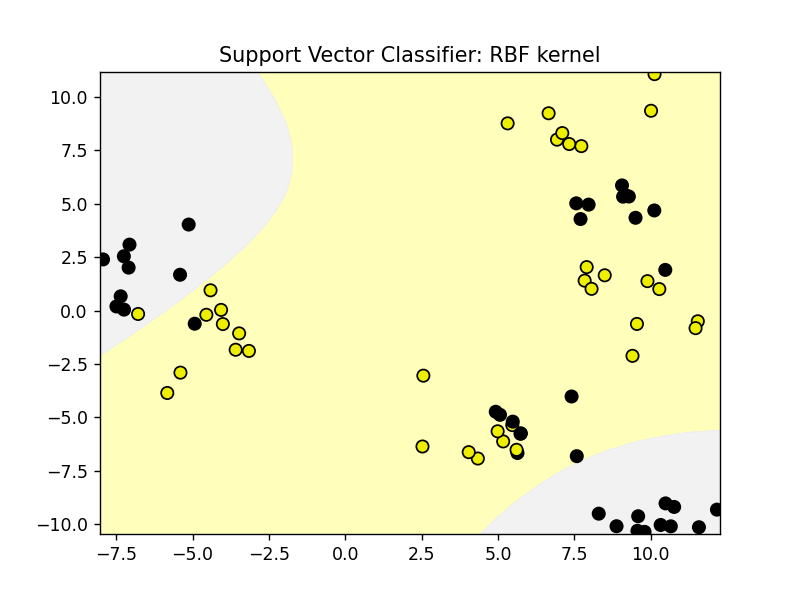

<IPython.core.display.Javascript object>


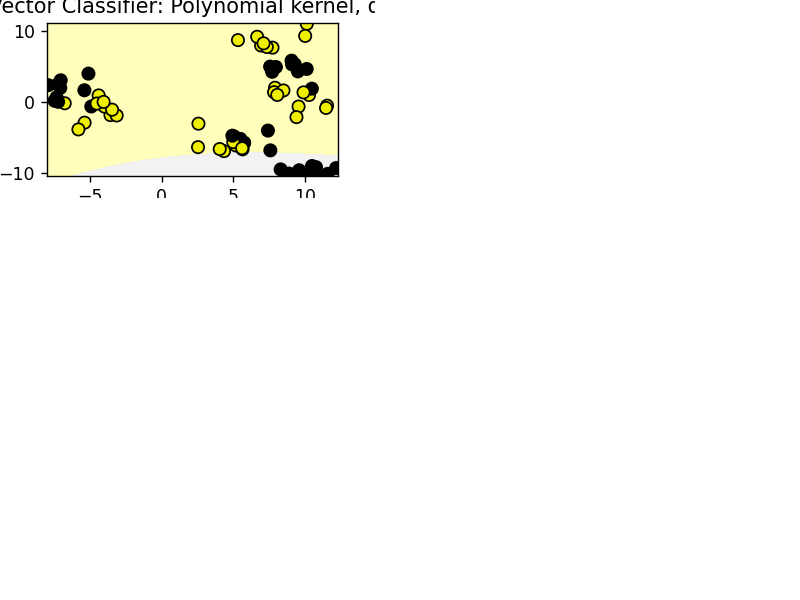

In [126]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
#plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
#                                 X_train, y_train, None, None,
#                                 'Support Vector Classifier: RBF kernel') #BY DEFAULT RBF REHTA HAI, BOTH WORK SAME!!!

plot_class_regions_for_classifier(SVC(kernel = 'rbf').fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

<IPython.core.display.Javascript object>


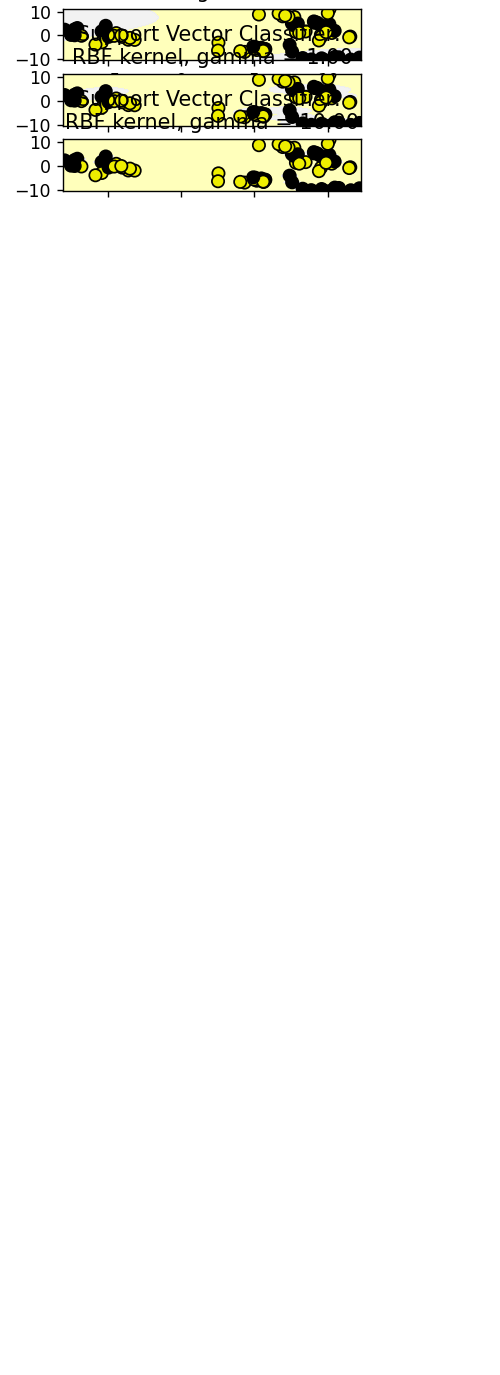

In [127]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

#print(subaxes)
for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [128]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train) #IN EFFECT, WO SVC,FIT HI HAI!
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

### Application of SVMs to a real dataset: unnormalized data

In [129]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.92
Accuracy of RBF-kernel SVC on test set: 0.94


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97


## Cross-validation

### Example based on k-NN classifier with fruit dataset (2 features)

In [131]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y) #cross val score is the function

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.75 0.75 0.83 0.83 0.82]
Mean cross-validation score (3-fold): 0.797


### A note on performing cross-validation for more advanced scenarios.

**In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:**

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

## Validation curve example
# I forgot very quickly, this may be imp!

In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

###  4x3 (4 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

In [133]:
print(train_scores)

[[0.46 0.44 0.42]
 [0.85 0.72 0.75]
 [0.92 0.9  0.93]
 [1.   1.   0.97]]


In [134]:
print(test_scores)

[[0.5  0.3  0.32]
 [0.85 0.7  0.63]
 [0.55 0.85 0.68]
 [0.4  0.2  0.37]]


<ipython-input-135-94dc91dd82a2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


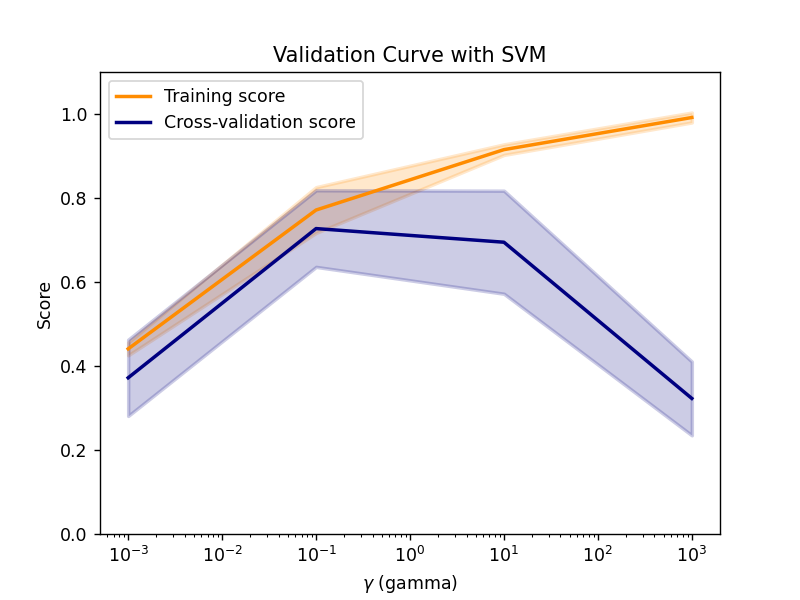

In [135]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision Trees

In [136]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3) #iris.data, iris.target naam hai
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


#### Setting max decision tree depth to help avoid overfitting

In [137]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


#### Visualizing decision trees

In [144]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

ValueError: Length of feature_names, 4 does not match number of features, 30

#### Pre-pruned version (max_depth = 3)

In [145]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

#### Feature importance

<IPython.core.display.Javascript object>


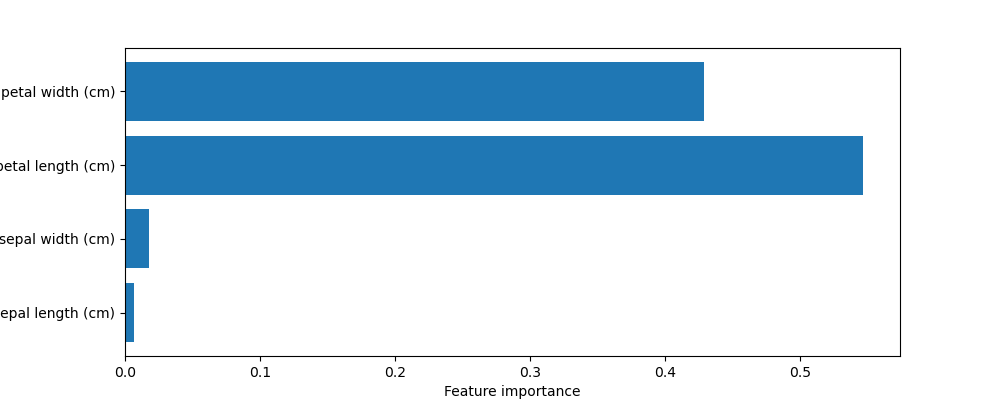

Feature importances: [0.01 0.02 0.55 0.43]


In [140]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

# ye kya kiya and kyu kiya samjha hi nahi

<IPython.core.display.Javascript object>


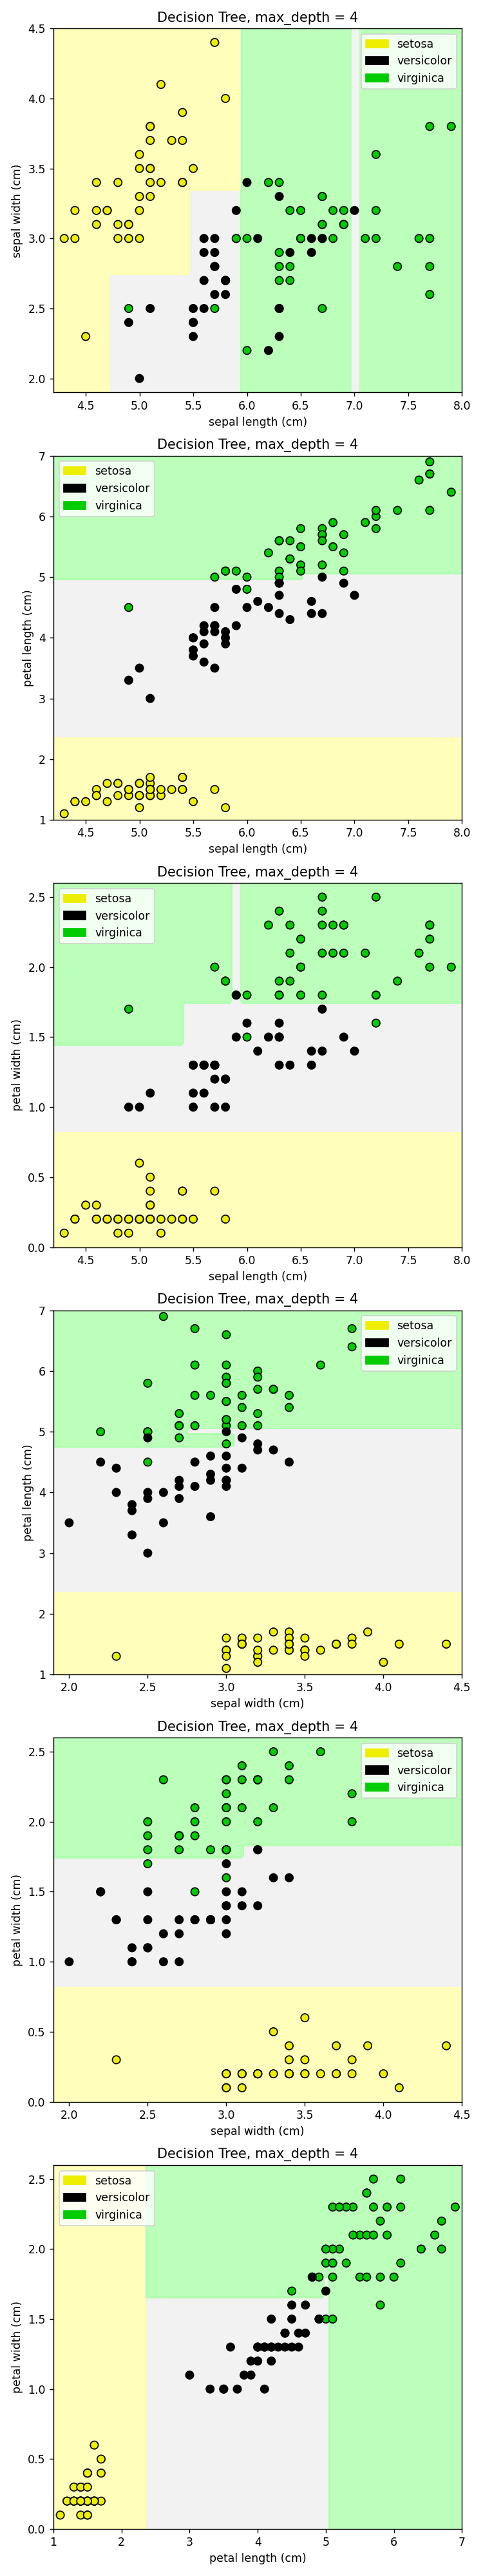

In [141]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

In [142]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10,
                            random_state = 0).fit(X_train, y_train)

#plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

In [143]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#plt.figure(figsize=(10,6),dpi=80)
#plot_feature_importances(clf, cancer.feature_names)
#plt.tight_layout()

#plt.show()

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94
